In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_biv import scatterplot_solution_1, scatterplot_solution_2

In this workspace, you'll make use of this data set describing various car attributes, such as fuel efficiency. The cars in this dataset represent about 3900 sedans tested by the EPA from 2013 to 2018. This dataset is a trimmed-down version of the data found [here](https://catalog.data.gov/dataset/fuel-economy-data).

In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). Use a _scatter plot_ to depict the data. What is the general relationship between these variables? Are there any points that appear unusual against these trends?

In [7]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,A
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,A
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,A
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,A
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,A


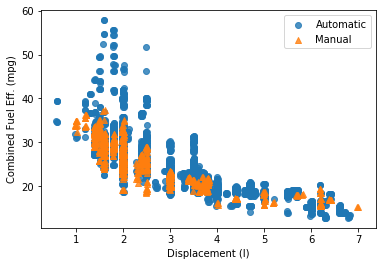

In [11]:
# YOUR CODE HERE
fuel_econ["trans_type"]=fuel_econ["trans"].apply(lambda x:x.split()[0])
ttype_markers = [["Automatic","o"],
                ["Manual","^"]]
for ttype, marker in ttype_markers:
    plot_data =fuel_econ.loc[fuel_econ["trans_type"]==ttype]
    sb.regplot(data=plot_data, x="displ", y = "comb",
              x_jitter =0.02, fit_reg = False, marker = marker);
plt.xlabel("Displacement (l)")
plt.ylabel("Combined Fuel Eff. (mpg)");
plt.legend(["Automatic","Manual"]);

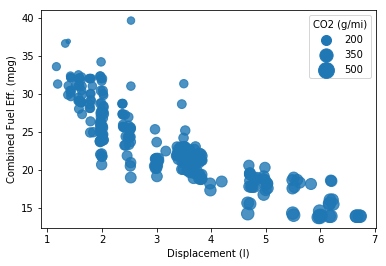

In [16]:
sb.regplot(data = fuel_econ.iloc[:300, :], x = "displ", y="comb",
          x_jitter =0.04, fit_reg = False,
          scatter_kws ={"s":fuel_econ.iloc[:300,:]["co2"]/4});
plt.xlabel("Displacement (l)")
plt.ylabel("Combined Fuel Eff. (mpg)");

sizes =[200,350,500]
base_color = sb.color_palette()[0]
legend_obj =[]
for s in sizes:
    legend_obj.append(plt.scatter([],[], s=s/2, color = base_color))
    
plt.legend(legend_obj, sizes, title="CO2 (g/mi)");

([], <a list of 0 Text yticklabel objects>)

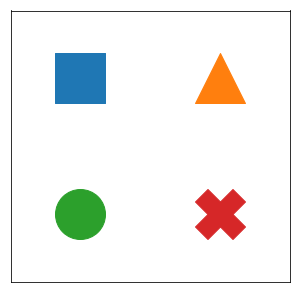

In [17]:
plt.figure(figsize = [5,5])

common_size = 2500
plt.scatter([0],[1], marker = 's', s = common_size)
plt.scatter([1],[1], marker = '^', s = common_size)
plt.scatter([0],[0], marker = 'o', s = common_size)
plt.scatter([1],[0], marker = 'X', s = common_size)

# a little bit of aesthetic cleaning
plt.xlim(-0.5,1.5)
plt.xticks([])
plt.ylim(-0.5,1.5)
plt.yticks([])

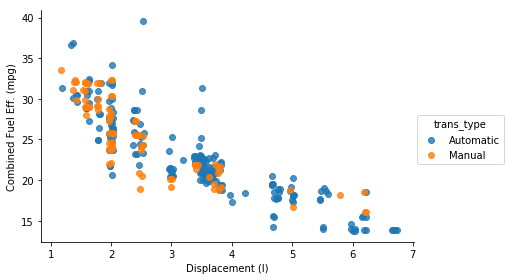

In [23]:
fuel_econ_subset = fuel_econ.iloc[:300,:]
g = sb.FacetGrid(data = fuel_econ_subset, hue ="trans_type", 
                 hue_order =["Automatic","Manual"],size = 4, aspect = 1.5)
g =g.map(sb.regplot, "displ","comb",x_jitter=0.04, fit_reg =False);
g.add_legend()
plt.xlabel("Displacement (l)")
plt.ylabel("Combined Fuel Eff. (mpg)");

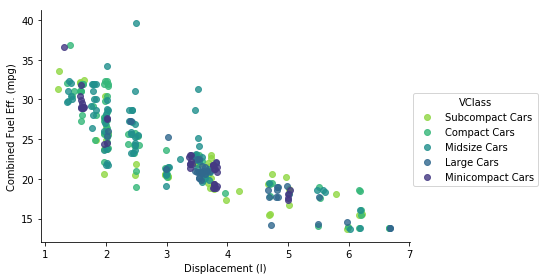

In [24]:
fuel_econ_subset = fuel_econ.iloc[:300,:]
g = sb.FacetGrid(data = fuel_econ_subset, hue ="VClass", 
                 size = 4, aspect = 1.5,palette ="viridis_r")
g =g.map(sb.regplot, "displ","comb",x_jitter=0.04, fit_reg =False);
g.add_legend()
plt.xlabel("Displacement (l)")
plt.ylabel("Combined Fuel Eff. (mpg)");

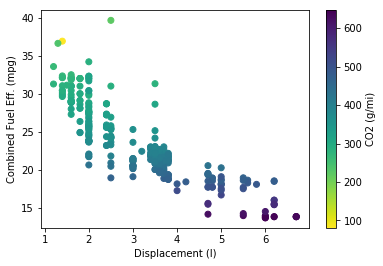

In [25]:
fuel_econ_subset = fuel_econ.iloc[:300,:]
plt.scatter(data = fuel_econ_subset, x="displ",y="comb",c = "co2",
                 cmap ="viridis_r")
plt.colorbar(label="CO2 (g/mi)")
plt.xlabel("Displacement (l)")
plt.ylabel("Combined Fuel Eff. (mpg)");

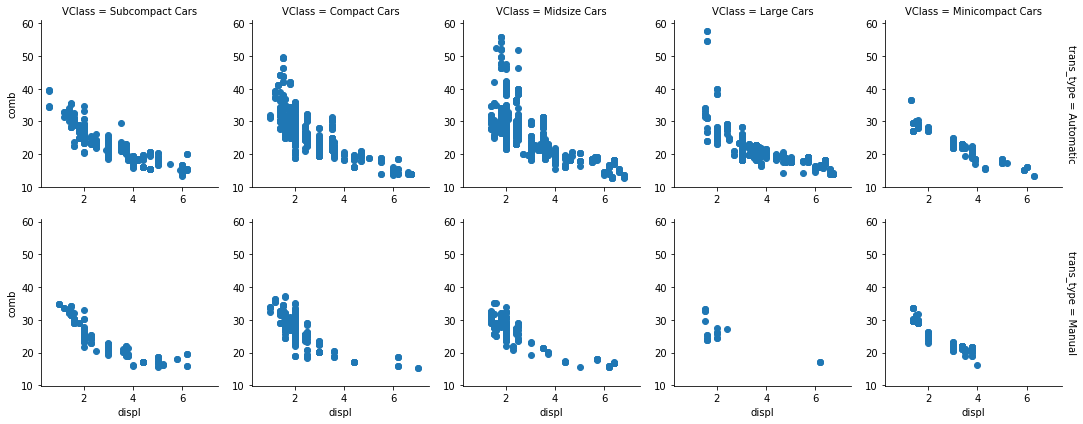

In [29]:
g = sb.FacetGrid(data = fuel_econ, col ="VClass", row ="trans_type",
                margin_titles =True)
g.map(plt.scatter, "displ", "comb");

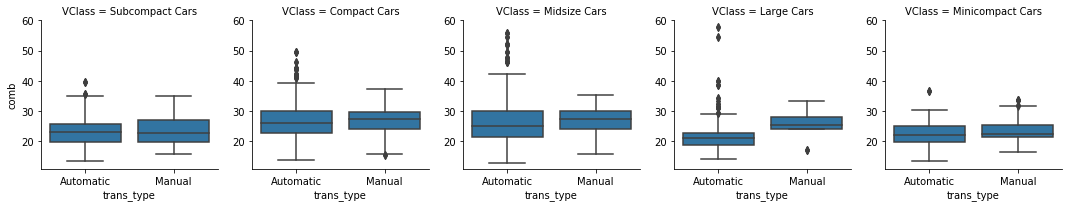

In [32]:
g = sb.FacetGrid(data = fuel_econ, col = "VClass")
g.map(sb.boxplot, "trans_type", "comb")

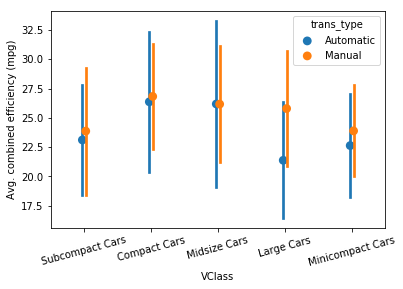

In [36]:
sb.pointplot(data = fuel_econ, x="VClass", y = "comb", hue ="trans_type",
            ci = "sd", linestyles ="", dodge =True);
plt.xticks(rotation=15)
plt.ylabel("Avg. combined efficiency (mpg)");

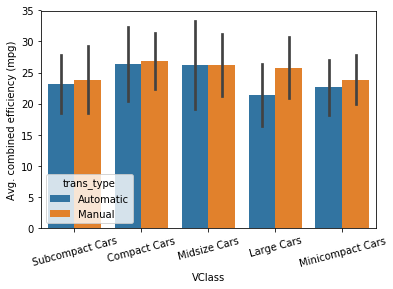

In [40]:
sb.barplot(data = fuel_econ, x="VClass", y = "comb", hue ="trans_type",
          ci = "sd");
plt.xticks(rotation=15)
plt.ylabel("Avg. combined efficiency (mpg)");

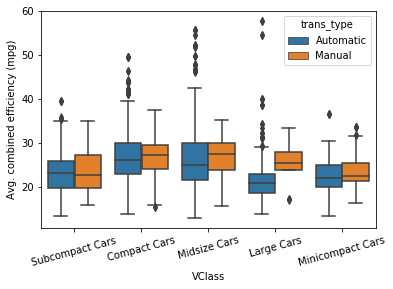

In [41]:
sb.boxplot(data = fuel_econ, x="VClass", y = "comb", hue ="trans_type");
plt.xticks(rotation=15)
plt.ylabel("Avg. combined efficiency (mpg)");

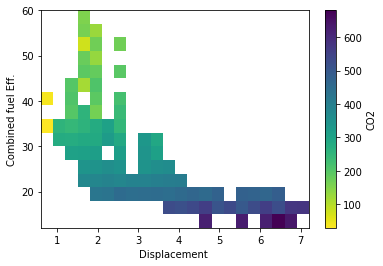

In [44]:
xbin_edges = np.arange(0.6, fuel_econ['displ'].max()+0.3, 0.3)
ybin_edges = np.arange(12,    fuel_econ['comb'].max()+3, 3)

# count number of points in each bin
xbin_idxs = pd.cut(fuel_econ['displ'], xbin_edges, right = False,
                    include_lowest = True, labels = False).astype(int)
ybin_idxs = pd.cut( fuel_econ['comb'], ybin_edges, right = False,
                    include_lowest = True, labels = False).astype(int)

pts_per_bin = fuel_econ.groupby([xbin_idxs, ybin_idxs]).size()
pts_per_bin = pts_per_bin.reset_index()
pts_per_bin = pts_per_bin.pivot(index = 'displ', columns = 'comb').values

z_wts = fuel_econ['co2'] / pts_per_bin[xbin_idxs, ybin_idxs]

# plot the data using the calculated weights
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', weights = z_wts,
           bins = [xbin_edges, ybin_edges], cmap = 'viridis_r', cmin = 0.5);
plt.xlabel('Displacement ')
plt.ylabel('Combined fuel Eff.');
plt.colorbar(label = 'CO2');

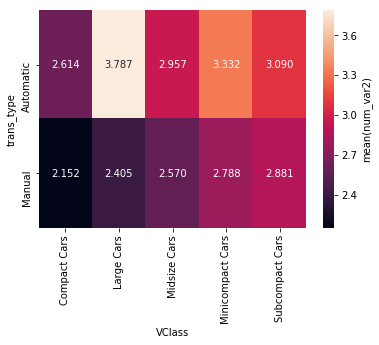

In [46]:
cat_means = fuel_econ.groupby(['VClass', 'trans_type']).mean()['displ']
cat_means = cat_means.reset_index(name = 'displ_avg')
cat_means = cat_means.pivot(index = 'trans_type', columns = 'VClass',
                            values = 'displ_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(num_var2)'})

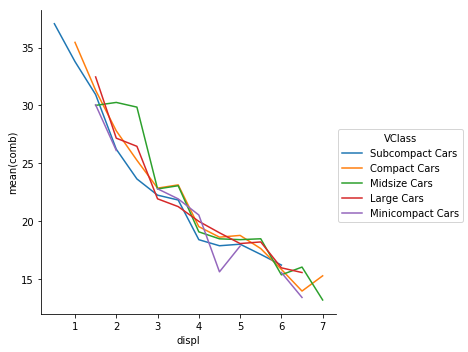

In [51]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

bin_edges = np.arange(0.25, fuel_econ['displ'].max()+0.5, 0.5)
g = sb.FacetGrid(data = fuel_econ, hue = 'VClass', size = 5)
g.map(mean_poly, "displ", "comb", bins = bin_edges)
g.set_ylabels('mean(comb)')
g.add_legend();

In [53]:
pokemon = pd.read_csv("./data/pokemon.csv")
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


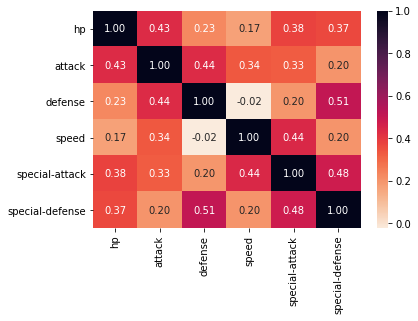

In [56]:
pkmn_stats = ["hp","attack","defense","speed","special-attack","special-defense"]
data = pokemon[pkmn_stats]
sb.heatmap(data.corr(), cmap ="rocket_r",annot=True,
          fmt =".2f");

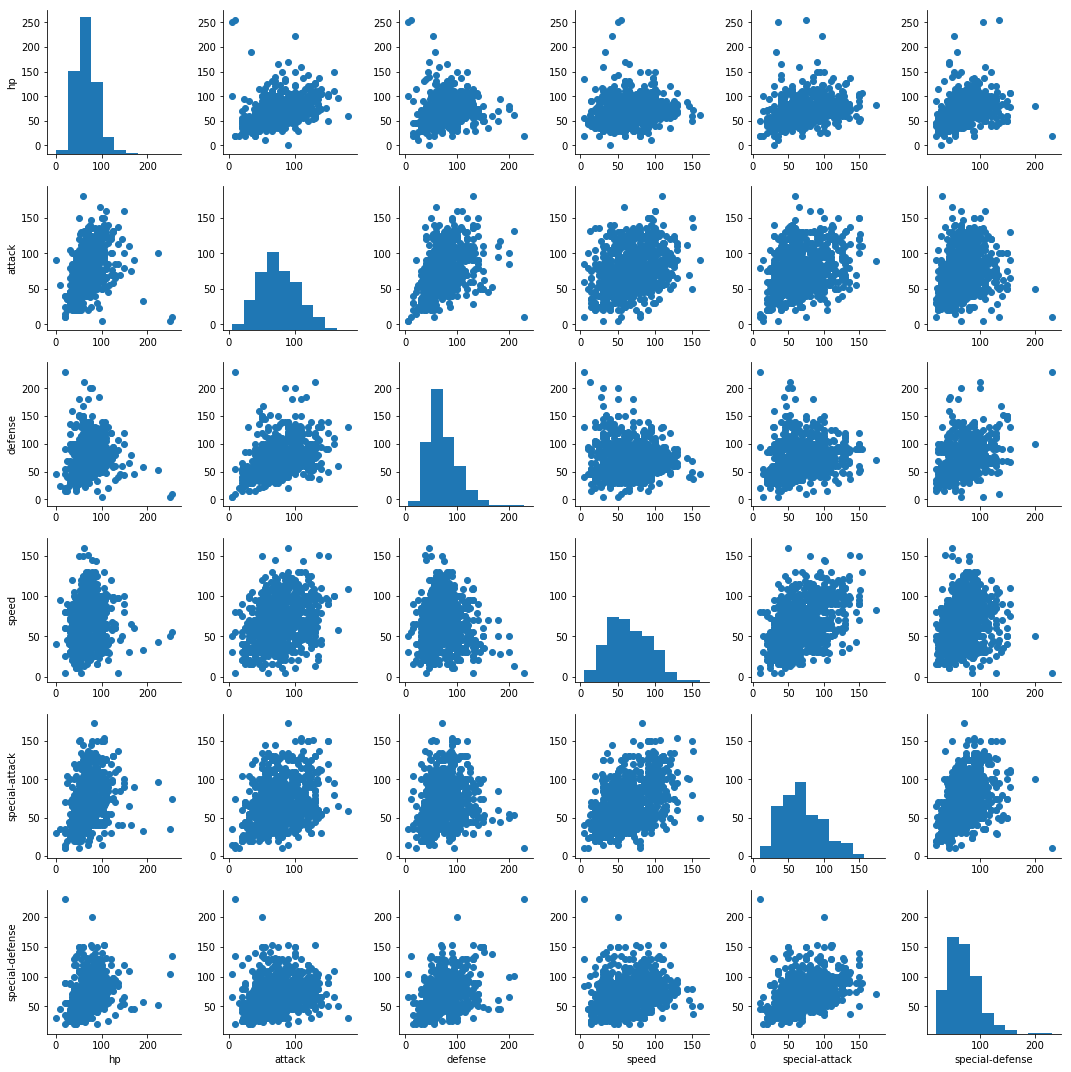

In [58]:
g = sb.PairGrid(data =pokemon,vars =pkmn_stats )
g = g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

In [ ]:
g = sb.PairGrid(data = df, x_vars = ['num_var1', 'num_var2', 'num_var3'],
                y_vars = ['cat_var1','cat_var2'])
g.map(sb.violinplot, inner = 'quartile')